In [3]:
#coding:utf-8
from pyteomics import mzxml, auxiliary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
import pickle
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
mass = pickle.load(open('./massdata.p','rb'))

In [4]:
#average mass spectrosopy
#para
delta = 0.5 #离子峰容差，高分辨常用0.05-0.1Da, 低分辨1.0Da
minpct_intensity = 1 #最小峰强度，平均质谱图中最小峰强度与最大分强度的比值0-100

In [5]:
mass.sort_values(by='mz',inplace=True)

In [6]:
mass['cat'] = (mass.mz.diff()>delta).cumsum()

In [7]:
group = mass.groupby('cat')

In [17]:
group

In [8]:
mz = group.apply(lambda x:x.mz.dot(x.intensity/x.intensity.sum()))
mz.name = 'mz'
intensity = group['intensity'].mean()
avg_mass = pd.concat([mz,intensity],axis=1)

<Container object of 160 artists>

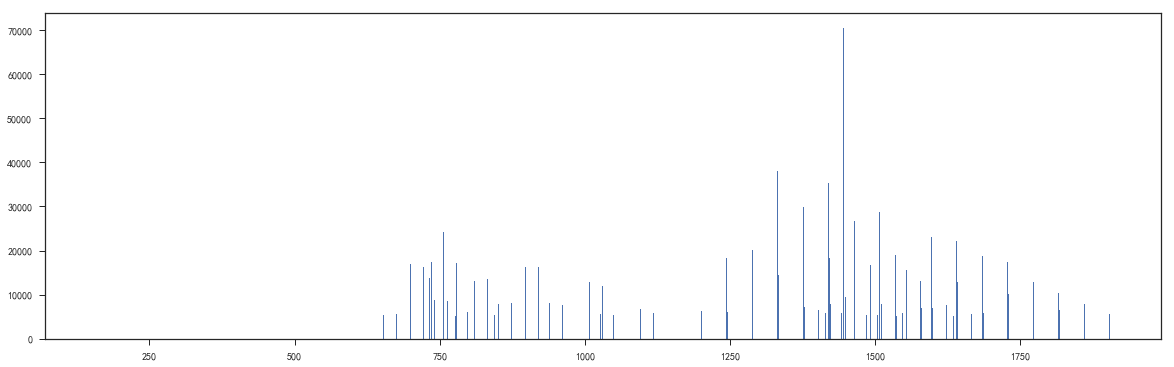

In [9]:
min_mask = avg_mass.intensity/avg_mass.intensity.max()>.05 #小峰过滤
avg_mass = avg_mass.loc[min_mask,:]
plt.bar(avg_mass.mz,avg_mass.intensity)#平均质谱图 

# 同位素峰过滤

In [10]:
#同位数
t = 1.1 #同位素峰最大间隔
avg_mass['cat1'] = (avg_mass['mz'].diff()>t).cumsum()

In [11]:
g = avg_mass.groupby('cat1').agg('idxmax')

In [12]:
tavg_mass = avg_mass.loc[g.intensity,['mz','intensity']]

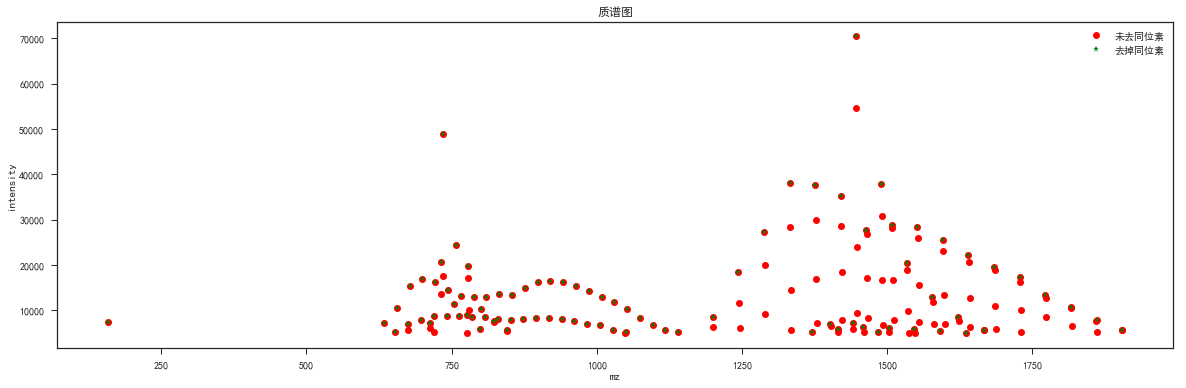

In [13]:
plt.plot(avg_mass.mz,avg_mass.intensity,'ro')#平均质谱图
plt.plot(tavg_mass.mz.values,tavg_mass.intensity,'g*')
plt.xlabel('mz')
plt.title('质谱图')
plt.ylabel('intensity')
plt.legend(['未去同位素','去掉同位素'])

In [2]:
from Chemometrics.basic import avg_mass,rm_isotopes

In [4]:
mass = pickle.load(open('./massdata.p','rb'))
avg = avg_mass(mass)
rmiso = rm_isotopes(avg)